# Conclusões - Estatística Descritiva e Visualização
Nesta video aula, o Dataset de cancer foi utilizado para tentar verificar se há realmente uma relação entre o tamanho do tumor e o fato dele ser Benigno (B) ou Maligno (M). Algumas tratativas foram utilizadas para facilitar esta análise.
Como (novamente reforçando) temos apenas o Dataset de <i>bike_share</i> do Projeto I, vamos tentar tirar algumas conclusões.

In [2]:
# Importanto bibliotecas
import pandas as pd
% matplotlib inline

path = 'C:/Users/thiagoPanini/Downloads/chicago.csv'
df_bike = pd.read_csv(path)
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551505 entries, 0 to 1551504
Data columns (total 8 columns):
Start Time       1551505 non-null object
End Time         1551505 non-null object
Trip Duration    1551505 non-null int64
Start Station    1551505 non-null object
End Station      1551505 non-null object
User Type        1551505 non-null object
Gender           1234638 non-null object
Birth Year       1234822 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 94.7+ MB


In [2]:
df_bike.head()

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,2017-01-01 00:00:36,2017-01-01 00:06:32,356,Canal St & Taylor St,Canal St & Monroe St (*),Customer,NaN,NaN
1,2017-01-01 00:02:54,2017-01-01 00:08:21,327,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,Subscriber,Male,1984.0
2,2017-01-01 00:06:06,2017-01-01 00:18:31,745,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,Subscriber,Male,1985.0
3,2017-01-01 00:07:28,2017-01-01 00:12:51,323,Franklin St & Monroe St,Clinton St & Tilden St,Subscriber,Male,1990.0
4,2017-01-01 00:07:57,2017-01-01 00:20:53,776,Broadway & Barry Ave,Sedgwick St & North Ave,Subscriber,Male,1990.0


### Vamos verificar se a duração da viagem (Trip Duration) está relacionada com o gênero

In [3]:
# Utilizando máscaras para selecionar apenas linhas do DataFrame cujo gênero é Masculino
df_bike_m = df_bike[df_bike['Gender'] == 'Male']
df_bike_m.info()

# Em seguida, realizar mesmo procedimento para gênero Feminino
df_bike_f = df_bike[df_bike['Gender'] == 'Female']
df_bike_f.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935854 entries, 1 to 1551504
Data columns (total 8 columns):
Start Time       935854 non-null object
End Time         935854 non-null object
Trip Duration    935854 non-null int64
Start Station    935854 non-null object
End Station      935854 non-null object
User Type        935854 non-null object
Gender           935854 non-null object
Birth Year       935854 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 64.3+ MB


,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
10,2017-01-01 00:17:13,2017-01-01 11:03:34,38781,Wilton Ave & Diversey Pkwy,Halsted St & Wrightwood Ave,Subscriber,Female,1988.0
14,2017-01-01 00:25:47,2017-01-01 00:39:53,846,Ravenswood Ave & Lawrence Ave,Clarendon Ave & Gordon Ter,Subscriber,Female,1987.0
18,2017-01-01 00:27:28,2017-01-01 00:42:44,916,Millennium Park,Michigan Ave & 18th St,Subscriber,Female,1990.0
20,2017-01-01 00:27:52,2017-01-01 00:33:46,354,Paulina Ave & North Ave,Damen Ave & Division St,Subscriber,Female,1982.0
22,2017-01-01 00:30:10,2017-01-01 01:10:34,2424,Lake Shore Dr & Ohio St,Broadway & Barry Ave,Subscriber,Female,1985.0


In [4]:
# O dataset passado como argumento para criação de df_bike_m (ou f) é um Panda Series de valores booleanos,
# indicando se a instância cumpre (True) ou não cumpre (False) a condição (igualdade) estabelecida.
mask = df_bike['Gender'] == 'Male'
print(mask)

0          False
1           True
2           True
3           True
4           True
5           True
6           True
7          False
8          False
9          False
10         False
11         False
12          True
13          True
14         False
15          True
16          True
17          True
18         False
19          True
20         False
21         False
22         False
23         False
24         False
25          True
26         False
27          True
28         False
29         False
           ...  
1551475    False
1551476    False
1551477     True
1551478     True
1551479    False
1551480     True
1551481     True
1551482     True
1551483     True
1551484     True
1551485     True
1551486     True
1551487     True
1551488     True
1551489     True
1551490     True
1551491     True
1551492    False
1551493     True
1551494    False
1551495    False
1551496     True
1551497    False
1551498     True
1551499     True
1551500     True
1551501     True
1551502    Fal

In [15]:
# Indexar o DataFrame original com essa série, leva ao retorno das linhas cujos valores são True no index
df_bike_m = df_bike[mask]
df_bike_m.head()

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
1,2017-01-01 00:02:54,2017-01-01 00:08:21,327,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,Subscriber,Male,1984.0
2,2017-01-01 00:06:06,2017-01-01 00:18:31,745,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,Subscriber,Male,1985.0
3,2017-01-01 00:07:28,2017-01-01 00:12:51,323,Franklin St & Monroe St,Clinton St & Tilden St,Subscriber,Male,1990.0
4,2017-01-01 00:07:57,2017-01-01 00:20:53,776,Broadway & Barry Ave,Sedgwick St & North Ave,Subscriber,Male,1990.0
5,2017-01-01 00:10:44,2017-01-01 00:21:27,643,State St & Kinzie St,Wells St & Polk St,Subscriber,Male,1970.0


#### Após a criação dos dois DataFrames a serem analisados...
É possível realizar comparações através do .describe() relacionando outras variáveis (colunas).

In [16]:
# Características de Trip Duration apenas do DataFrame Masculino
df_bike_m['Trip Duration'].describe()

count    935854.000000
mean        673.063025
std         988.868490
min          60.000000
25%         338.000000
50%         541.000000
75%         861.000000
max       86096.000000
Name: Trip Duration, dtype: float64

In [17]:
# Características de Trip Duration apenas do DataFrame Feminino
df_bike_f['Trip Duration'].describe()

count    298784.000000
mean        783.663285
std        1140.193785
min          60.000000
25%         398.750000
50%         648.000000
75%        1010.000000
max       85782.000000
Name: Trip Duration, dtype: float64

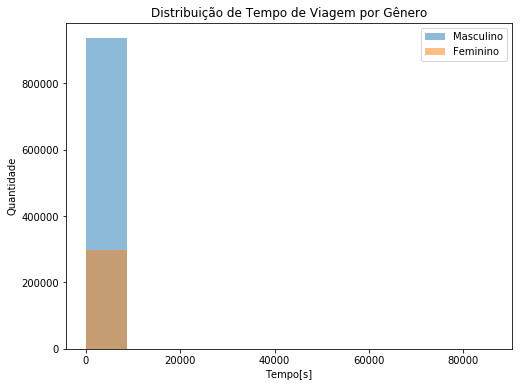

In [18]:
import matplotlib.pyplot as plt
% matplotlib inline

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_bike_m['Trip Duration'], alpha=0.5, label='Masculino')
ax.hist(df_bike_f['Trip Duration'], alpha=0.5, label='Feminino')
ax.set_title('Distribuição de Tempo de Viagem por Gênero')
ax.set_xlabel('Tempo[s]')
ax.set_ylabel('Quantidade')
ax.legend(loc='upper right')
plt.show()

#### Análise:
A princípio, não foi encontrada nenhuma relação entre o gênero e a duração da viagem. Apenas foi possível perceber que as mulheres geralmente viajam por mais tempo do que os homens. O gráfico acima ficou falho.
<b>Próximos passos:</b> Analisar coluna Birth Year e verificar se a idade influencia na duração da viagem e/ou o fato do usuário ser cliente ou subscriber.

In [12]:
# Analisando a coluna Birth Year
df_bike['Birth Year'].value_counts()

1989.0    76489
1991.0    64447
1988.0    64041
1990.0    63643
1987.0    62329
1986.0    60082
1992.0    56191
1984.0    54524
1985.0    53702
1983.0    45211
1982.0    44005
1993.0    43932
1981.0    38406
1980.0    34901
1979.0    27255
1977.0    25973
1978.0    25291
1994.0    25132
1976.0    21303
1975.0    20761
1974.0    20015
1970.0    19027
1969.0    18422
1968.0    16983
1972.0    16771
1973.0    16337
1966.0    15529
1971.0    15171
1964.0    14723
1962.0    14551
          ...  
1948.0      788
1999.0      617
1944.0      414
2000.0      400
1947.0      385
1918.0      294
1939.0      198
1921.0      194
1942.0      187
1940.0      156
1934.0      145
1941.0      103
1900.0       97
2001.0       71
1899.0       52
1943.0       49
1901.0       41
1906.0       26
1930.0       24
1916.0       24
1938.0       17
2004.0       14
2016.0       14
2003.0       13
1931.0       10
1909.0        9
2002.0        8
1923.0        2
1936.0        1
1915.0        1
Name: Birth Year, Length

O método value_counts() da Serie de Pandas referente a coluna ['Birth Year'] retornou 82 valores diferentes. Como este Dataset data de 2017, vamos separar os dados em dois grupos diferentes: maiores de 25 anos e menores de 25 anos, ou seja, nascidos depois e antes de 1992 (2017-25 = 1992).

In [5]:
df_maior = df_bike[df_bike['Birth Year'] > 1992]
df_maior.head()

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
43,2017-01-01 00:47:03,2017-01-01 00:57:22,619,Racine Ave & Fullerton Ave,Halsted St & Blackhawk St (*),Subscriber,Male,1993.0
84,2017-01-01 01:53:57,2017-01-01 01:58:12,255,May St & Taylor St,May St & Taylor St,Subscriber,Male,1997.0
87,2017-01-01 01:54:33,2017-01-01 02:11:43,1030,Wilton Ave & Belmont Ave,Lake Shore Dr & Belmont Ave,Subscriber,Male,1993.0
88,2017-01-01 01:57:15,2017-01-01 02:03:04,349,State St & Randolph St,Franklin St & Jackson Blvd,Subscriber,Male,1996.0
92,2017-01-01 02:01:39,2017-01-01 02:06:21,282,May St & Taylor St,Halsted St & Polk St,Subscriber,Male,1997.0


In [6]:
df_maior.describe()

,Trip Duration,Birth Year
count,94501.000000,94501.000000
mean,691.269087,1994.155099
std,1239.200716,1.532587
min,60.000000,1993.000000
25%,307.000000,1993.000000
50%,528.000000,1994.000000
75%,902.000000,1995.000000
max,85782.000000,2016.000000


In [3]:
df_menor = df_bike[df_bike['Birth Year'] < 1992]
df_menor.describe()

,Trip Duration,Birth Year
count,1.084130e+06,1.084130e+06
mean,6.993433e+02,1.979128e+03
std,1.007901e+03,1.060952e+01
min,6.000000e+01,1.899000e+03
25%,3.530000e+02,1.973000e+03
50%,5.660000e+02,1.983000e+03
75%,8.960000e+02,1.987000e+03
max,8.609600e+04,1.991000e+03


Aparentemente não há relação entre a idade e o tempo de duração das viagens.

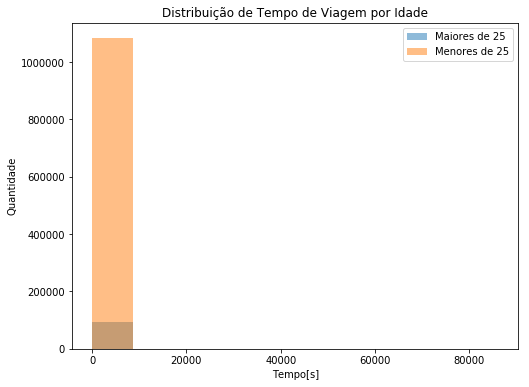

In [7]:
import matplotlib.pyplot as plt
% matplotlib inline

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_maior['Trip Duration'], alpha=0.5, label='Maiores de 25')
ax.hist(df_menor['Trip Duration'], alpha=0.5, label='Menores de 25')
ax.set_title('Distribuição de Tempo de Viagem por Idade')
ax.set_xlabel('Tempo[s]')
ax.set_ylabel('Quantidade')
ax.legend(loc='upper right')
plt.show()

In [11]:
print(f'A duração média das viagens de MAIORES de 25 é {df_maior["Trip Duration"].mean():.2f}s, \
já a duração média de viagem de MENORES DE 25 anos é {df_menor["Trip Duration"].mean():.2f}s')

A duração média das viagens de MAIORES de 25 é 691.27s, já a duração média de viagem de MENORES DE 25 anos é 699.34s


Vamos avaliar a relação entre Customer x Subscribers x Idade

In [12]:
df_bike.head()

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,2017-01-01 00:00:36,2017-01-01 00:06:32,356,Canal St & Taylor St,Canal St & Monroe St (*),Customer,NaN,NaN
1,2017-01-01 00:02:54,2017-01-01 00:08:21,327,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,Subscriber,Male,1984.0
2,2017-01-01 00:06:06,2017-01-01 00:18:31,745,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,Subscriber,Male,1985.0
3,2017-01-01 00:07:28,2017-01-01 00:12:51,323,Franklin St & Monroe St,Clinton St & Tilden St,Subscriber,Male,1990.0
4,2017-01-01 00:07:57,2017-01-01 00:20:53,776,Broadway & Barry Ave,Sedgwick St & North Ave,Subscriber,Male,1990.0


In [14]:
df_custom = df_bike[df_bike['User Type'] == 'Customer']
df_custom.describe()

,Trip Duration,Birth Year
count,317162.000000,479.000000
mean,1873.963095,1980.643006
std,2754.547052,7.154007
min,60.000000,1957.000000
25%,927.000000,1978.000000
50%,1378.000000,1978.000000
75%,1961.000000,1985.000000
max,86338.000000,1997.000000


In [15]:
df_subs = df_bike[df_bike['User Type'] == 'Subscriber']
df_subs.describe()

,Trip Duration,Birth Year
count,1.234339e+06,1.234339e+06
mean,6.997415e+02,1.980864e+03
std,1.028558e+03,1.099279e+01
min,6.000000e+01,1.899000e+03
25%,3.500000e+02,1.975000e+03
50%,5.650000e+02,1.984000e+03
75%,8.980000e+02,1.989000e+03
max,8.609600e+04,2.016000e+03


<b> Parece que encontramos uma relação não com a idade, mas sim com a Duração da Viagem </b>


In [17]:
print(f'Duração média de viagem de Clientes: {df_custom["Trip Duration"].mean():.2f}s')
print(f'Duração média de viagem de Assinantes: {df_subs["Trip Duration"].mean():.2f}s')

Duração média de viagem de Clientes: 1873.96s
Duração média de viagem de Assinantes: 699.74s


<b>Clientes viajam, em média, por mais tempo que Assinantes</b>

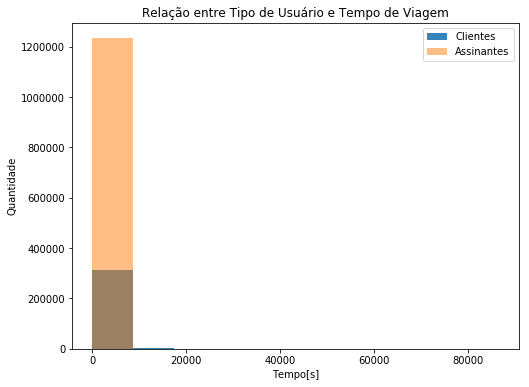

In [23]:
import matplotlib.pyplot as plt
% matplotlib inline

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_custom['Trip Duration'], alpha=0.9, label='Clientes')
ax.hist(df_subs['Trip Duration'], alpha=0.5, label='Assinantes')
ax.set_title('Relação entre Tipo de Usuário e Tempo de Viagem')
ax.set_xlabel('Tempo[s]')
ax.set_ylabel('Quantidade')
ax.legend(loc='upper right')
plt.show()